프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
====

- - -
__데이터 가져오기__

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(type(diabetes))

diabetes.keys()

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

> scikit-learn에서 제공하는 당뇨병 데이터셋을 가져왔습니다.

In [2]:
print(diabetes.DESCR)
print(diabetes.feature_names)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

> 특성으로 나이, 성별, bmi지수, 혈압, tc, ldl, hdl, tch, ltg, glu 등 10개의 속성이  
  'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'으로 저장되어 있습니다.  

1. age : 나이  
2. sex : 성별  
3. bmi : bmi 지수  
4. bp  : 평균 혈압  
5. s1  : 총 혈청 콜레스트롤(tc)  
6. s2  : 저밀도 지단백질(ldl)  
7. s3  : 고밀도 지단백질(hdl)  
8. s4  : 총 콜레스트롤(tch)
9. s5  : 혈청 트리글리세이드 수치 허용량(ltg)
10. s6  : 혈당 수치(glu)   


    알고리즘이 데이터를 학습하려면 참고할 모든 특성 데이터가 숫자로 표현할 수 있어야 합니다.  
    그런데 성별과 그 외 콜레스트롤 등 생소한 속성 데이터들은 숫자로 표현이 되어있을까요?  
    확인을 해봅시다.

In [3]:
import pandas as pd

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


> pandas로 배열을 확인해 본 결과 10개의 특성 모두 숫자로 표현되어 있습니다.  
  음수로 표현할 리 없는 특성들도 음수와 실수로 나오는 이유는 정규화가 진행된 데이터이기 때문입니다.

- - -
__데이터 준비하기__

In [4]:
df_X = diabetes.data
df_y = diabetes.target

print(type(df_X), type(df_y))
print(df_X.shape, df_y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(442, 10) (442,)


> ```df_X```와  ```df_y```에, 각각 ```diabetes.data```와 ```diabetes.target```가 numpy array타입으로 할당됐습니다.  
  442개의 데이터도 확인됐습니다.

- - -
__train 데이터와 test 데이터로 분리하기__

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=9)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\n')

(353, 10)
(89, 10)
(353,)
(89,)


> ```train_test_split```을 이용해 당뇨병 데이터를 **학습용 데이터**와 **테스트용 데이터**로 분리했습니다.  
  학습용 데이터 353개, 테스트 데이터 89개로 분류되었습니다.

- - -
__모델 준비하기__

In [6]:
import numpy as np

W = np.random.rand(10)
b = np.random.rand()

print(W)
print(b)

[0.35153926 0.4407733  0.36443193 0.10708145 0.648644   0.52896569
 0.23662143 0.91057005 0.80453766 0.56335462]
0.1825338110494199


> **특성의 개수 만큼 쓸 변수 W** 와 **상수 b**를 랜덤함수로 불러와 가중치로 사용해보겠습니다.

In [7]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

pred = model(X_train, W, b)
pred[:30]

array([ 2.68788696e-01,  5.02297350e-01, -8.87257065e-05,  1.78968416e-01,
        4.21791420e-01, -3.89176670e-02,  1.04279680e-01,  2.83837029e-02,
        1.66895907e-02,  2.61218109e-01,  2.45054918e-01,  1.63661500e-01,
        2.40732352e-01,  2.28815868e-01,  3.83457709e-01,  3.03783342e-01,
        3.43308696e-01,  7.56855017e-02,  2.07179914e-01,  2.39170291e-01,
        3.03228602e-01,  2.05619325e-01,  3.01021105e-01,  1.38646172e-01,
        1.55279990e-01,  1.49427600e-01,  1.08141284e-01,  4.66574251e-04,
       -3.73193594e-03,  1.82936967e-01])

> 모델 함수를 구현하고 바로 **학습용 특성 데이터** ```X_train```을 넣어봤습니다.  

    W와 b로 예측값에 가까워질 수 있는 가중치를 입력해야 하지만,  
    아직 예측값에 가까워질 수 있는 가중치를 모르기 때문에 난수생성기에 맡기도록 하겠습니다.

In [8]:
print(y_train[:30])
print(pred[:30])

[270. 306. 178. 109. 180.  42.  63.  49.  53.  85. 206.  64.  51. 245.
 277. 217. 259. 155. 101.  91. 198. 146. 259. 288. 160.  83.  92. 170.
  78. 104.]
[ 2.68788696e-01  5.02297350e-01 -8.87257065e-05  1.78968416e-01
  4.21791420e-01 -3.89176670e-02  1.04279680e-01  2.83837029e-02
  1.66895907e-02  2.61218109e-01  2.45054918e-01  1.63661500e-01
  2.40732352e-01  2.28815868e-01  3.83457709e-01  3.03783342e-01
  3.43308696e-01  7.56855017e-02  2.07179914e-01  2.39170291e-01
  3.03228602e-01  2.05619325e-01  3.01021105e-01  1.38646172e-01
  1.55279990e-01  1.49427600e-01  1.08141284e-01  4.66574251e-04
 -3.73193594e-03  1.82936967e-01]


> 난수로 작동한 모델을 가지고 정답과 예측값을 비교해봤습니다.  
  예상대로 아직은 예측했다고 볼 수 없는 결과입니다.  

    예측값이 정답에 근접하려면 정답과 비교해서 나오는 오차만큼 가중치에 변화를 줘야합니다.
    그러기 위해선 먼저 예측값의 오차를 반환해주는 손실함수를 정의하겠습니다.

- - -
__손실함수 ```loss``` 정의하기__

In [9]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse


MSE(pred, y_train)

29678.2785851484

> 손실함수로는 **MSE**를 사용하겠습니다.  

- 모델이 얼마나 틀렸는지 확인하는 지표로는 MAE, MSE, RMSE, R-Squared 등이 있습니다.  
 - MAE는 오차의 절댓값의 평균을 나타냅니다.  
 - MSE는 오차의 제곱의 평균을 나타냅니다.  
 - RMSE는 MSE의 제곱근을 나타냅니다.  
 - R-Squared는 원래 값과 비교하여 얼마나 잘 맞는지를 백분율로 나타냅니다.   
 

    손실함수 지표로 무엇을 선택하느냐에 따라 학습정도나 학습방식이 달라질 것 같습니다.

In [10]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


loss(X_train, W, b, y_train)

29678.2785851484

> MSE를 사용했기 때문에 오차의 제곱의 평균을 반환하며 이는 ```MSE(pred, y_train)```와 같습니다.  
  다만, ```loss```함수는 학습을 통해 변화를 준 가중치를 매 번 새로 갱신해서 적용을 해줄 것입니다.

- - -
__기울기를 구하는 ```gradient``` 함수 구현하기__

In [11]:
def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    
    dw = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dw, db

dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [ -52.30874562   -1.81909285 -149.96670637 -115.54671941  -55.87450548
  -49.17710278  105.54087951 -109.56820121 -147.90264309 -105.28064682]
db: -307.592456585132


> 예측값을 참고해서 W의 기울기와 b의 기울기를 계산합니다.  

- 간단하게 정의하면 예측값이 정답보다 크면 가중치를 보다 낮추고, 정답보다 낮으면 가중치를 보다 늘리고,  
  정답과 멀리 떨어져 있으면 가중치에 변화를 크게, 가까우면 변화를 적게 주면서 **최적의 가중치를 찾기 위한 함수**입니다.

- - -
__하이퍼 파라미터인 학습률을 설정하고 모델 학습하기__

In [12]:
LEARNING_RATE = 0.0001

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 50 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 50 : Loss 29195.7218
Iteration 100 : Loss 28722.5454
Iteration 150 : Loss 28258.5645
Iteration 200 : Loss 27803.5979
Iteration 250 : Loss 27357.4679
Iteration 300 : Loss 26920.0006
Iteration 350 : Loss 26491.0252
Iteration 400 : Loss 26070.3744
Iteration 450 : Loss 25657.8842
Iteration 500 : Loss 25253.3940
Iteration 550 : Loss 24856.7461
Iteration 600 : Loss 24467.7862
Iteration 650 : Loss 24086.3628
Iteration 700 : Loss 23712.3275
Iteration 750 : Loss 23345.5349
Iteration 800 : Loss 22985.8424
Iteration 850 : Loss 22633.1102
Iteration 900 : Loss 22287.2013
Iteration 950 : Loss 21947.9814
Iteration 1000 : Loss 21615.3189


> 가중치를 입혀서 예측값을 출력하는 모델함수 ```model(X, W, b)``` ,  
  MSE지표를 이용해 정답값과 예측값의 차이를 출력하는 손실함수 ```loss(X, W, b, y)``` ,  
  예측값의 오차로 다음 가중치의 방향을 잡아줄 기울기를 구하는 ```gradient(X, W, b, y)``` 함수를 이용해  
  상수 ```LEARNING_RATE```로 학습률을 기준잡아 데이터 학습을 진행하고  
  빈 리스트 ```losses```에 결과값을 담아 오차가 줄어가는 모습을 담았습니다.  

__1. ```model``` 함수에서 예측값을 추출__  
__2. ```loss```에서 얻은 오차와 예측값을 기준으로 ```gradient```에서 다음 예측값에 필요한 기울기를 계산__  
__3. ```gradient```에서 얻은 기울기와 설정된 ```LEARNING_RATE``` 학습률 만큼 다음 가중치를 업데이트__  
__4. 갱신된 가중치로 ```model``` 함수를 다시 실행하고 나온 예측값을 ```losses```에 저장__


    결과 출력이 너무 많으면 읽는데 불편함을 느끼게 될까봐 반복 50번 마다 값을 출력시켰습니다.  
    아직 학습이 더 필요한 것 같으니 학습량을 매개변수로 받아 학습을 반복하는 함수를 만들어 실행시켜 보겠습니다.
  

In [13]:
LEARNING_RATE = 0.0001

def learning(n):
    global W
    global b
    for i in range(1, n):
        dW, db = gradient(X_train, W, b, y_train)
        W -= LEARNING_RATE * dW
        b -= LEARNING_RATE * db
        L = loss(X_train, W, b, y_train)
        losses.append(L)
        if i % int(n/20) == 0:
            print('Iteration %d : Loss %0.4f' % (i, L))


learning(50000)

Iteration 2500 : Loss 11068.4584
Iteration 5000 : Loss 6994.2203
Iteration 7500 : Loss 5343.1851
Iteration 10000 : Loss 4615.4385
Iteration 12500 : Loss 4251.4955
Iteration 15000 : Loss 4039.7761
Iteration 17500 : Loss 3898.1477
Iteration 20000 : Loss 3793.1866
Iteration 22500 : Loss 3710.1946
Iteration 25000 : Loss 3641.9595
Iteration 27500 : Loss 3584.4653
Iteration 30000 : Loss 3535.2001
Iteration 32500 : Loss 3492.4489
Iteration 35000 : Loss 3454.9714
Iteration 37500 : Loss 3421.8377
Iteration 40000 : Loss 3392.3340
Iteration 42500 : Loss 3365.9029
Iteration 45000 : Loss 3342.1025
Iteration 47500 : Loss 3320.5782


> 학습률(```LEARNING_RATE```)을 **0.0001**로 주고 학습을 **50000**번 진행해봤습니다.  

In [14]:
prediction = model(X_train, W, b)

print(list(map(int, prediction[:10])))
print(y_train[:10])

[216, 243, 124, 112, 219, 94, 110, 103, 94, 160]
[270. 306. 178. 109. 180.  42.  63.  49.  53.  85.]


> 학습용 데이터를 앞과 뒤에서 5개씩 가져와 정답과 비교를 해봤습니다.   

    난수생성기로 만들었던 모델에 비하면 정답에 엄청 근접했지만, 만족스러운 결과는 아닙니다.  
    오차를 더 줄일 수 있는지 데이터를 확인해보겠습니다.

In [15]:
train_df = pd.DataFrame(data=X_train, columns=diabetes.feature_names)

train_df['label'] = y_train
train_df['pred'] = prediction
train_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label,pred
0,-0.001882,-0.044642,0.033673,0.125158,0.024574,0.026243,-0.010266,-0.002592,0.026714,0.061054,270.0,216.575487
1,-0.020045,-0.044642,0.085408,-0.036656,0.091996,0.089499,-0.061809,0.145012,0.080948,0.052770,306.0,243.034408
2,0.016281,-0.044642,-0.046085,-0.005671,-0.075870,-0.061438,-0.013948,-0.039493,-0.051401,0.019633,178.0,124.994089
3,0.034443,0.050680,-0.001895,-0.012556,0.038334,0.013717,0.078093,-0.039493,0.004552,-0.096346,109.0,112.995012
4,0.048974,0.050680,0.081097,0.021872,0.043837,0.064134,-0.054446,0.071210,0.032433,0.048628,180.0,219.520979
...,...,...,...,...,...,...,...,...,...,...,...,...
348,-0.041840,-0.044642,0.041218,-0.026328,-0.031840,-0.030437,-0.036038,0.002943,0.033657,-0.017646,52.0,178.672495
349,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0,138.065158
350,-0.089063,-0.044642,-0.061174,-0.026328,-0.055231,-0.054549,0.041277,-0.076395,-0.093936,-0.054925,99.0,71.607189
351,0.030811,-0.044642,-0.020218,-0.005671,-0.004321,-0.029497,0.078093,-0.039493,-0.010904,-0.001078,148.0,126.948077


> 학습용 데이터에 타깃```lable```과 예측값```pred```를 추가하고 pandas로 확인해봤습니다.

In [16]:
train_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label,pred
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,0.000927,-0.000086,0.000975,0.000932,0.000197,0.000345,-0.000311,-0.000096,0.000130,0.000729,153.980170,153.999403
std,0.047953,0.047627,0.047102,0.047144,0.046868,0.047771,0.047061,0.047685,0.047607,0.047894,77.801738,45.026471
min,-0.107226,-0.044642,-0.090275,-0.112400,-0.126781,-0.115613,-0.091262,-0.076395,-0.126097,-0.137767,25.000000,59.488434
25%,-0.034575,-0.044642,-0.033151,-0.033214,-0.033216,-0.029497,-0.036038,-0.039493,-0.033249,-0.030072,87.000000,120.616587
50%,0.009016,-0.044642,-0.007284,-0.005671,-0.004321,-0.003193,-0.006584,-0.002592,-0.001499,0.003064,144.000000,154.248965
75%,0.038076,0.050680,0.033673,0.034496,0.027326,0.028435,0.026550,0.034309,0.031815,0.027917,217.000000,185.431177
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133599,0.135612,346.000000,278.914658


> ```describe```로 수치 통계를 확인해봤습니다.  

    통계값을 가져와도 도움이 될만한 내용은 없는 것 같습니다.

In [17]:
error = y_train - prediction
train_df['error'] = abs(error)
temp = train_df.sort_values(by=['error']).reset_index(drop=True)

temp

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label,pred,error
0,0.001751,-0.044642,-0.039618,-0.100923,-0.029088,-0.030124,0.044958,-0.050195,-0.068330,-0.129483,65.0,64.950512,0.049488
1,-0.063635,0.050680,-0.079497,-0.005671,-0.071743,-0.066449,-0.010266,-0.039493,-0.018118,-0.054925,101.0,100.743495,0.256505
2,0.067136,0.050680,-0.030996,0.004658,0.024574,0.035638,-0.028674,0.034309,0.023375,0.081764,172.0,171.204925,0.795075
3,0.067136,-0.044642,-0.038540,-0.026328,-0.031840,-0.026366,0.008142,-0.039493,-0.027129,0.003064,127.0,125.672271,1.327729
4,0.016281,0.050680,0.009961,-0.043542,-0.096510,-0.094632,-0.039719,-0.039493,0.017037,0.007207,151.0,149.670647,1.329353
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,-0.041840,-0.044642,0.041218,-0.026328,-0.031840,-0.030437,-0.036038,0.002943,0.033657,-0.017646,52.0,178.672495,126.672495
349,0.038076,0.050680,0.005650,0.032201,0.006687,0.017475,-0.024993,0.034309,0.014823,0.061054,311.0,182.144205,128.855795
350,0.005383,0.050680,0.034751,-0.001080,0.152538,0.198788,-0.061809,0.185234,0.015567,0.073480,84.0,214.095637,130.095637
351,-0.009147,-0.044642,0.011039,-0.057314,-0.024960,-0.042963,0.030232,-0.039493,0.017037,-0.005220,276.0,140.780933,135.219067


> 원인을 찾기 위해 오차가 가장 큰 결과와 작은 결과를 가져와 비교해보겠습니다.  

    저는 나이와 성별, bmi지수 등이 당뇨병 수치에 주는 영향을 모르니 최대한 주어진 데이터를 이용해 찾아봐야겠습니다.

In [18]:
train_df['pred_real'] = train_df['pred'] - train_df['label']
temp = train_df.sort_values(by=['pred_real']).reset_index(drop=True)

temp

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label,pred,error,pred_real
0,-0.092695,-0.044642,0.028284,-0.015999,0.036958,0.024991,0.056003,-0.039493,-0.005145,-0.001078,302.0,141.874143,160.125857,-160.125857
1,-0.009147,-0.044642,0.011039,-0.057314,-0.024960,-0.042963,0.030232,-0.039493,0.017037,-0.005220,276.0,140.780933,135.219067,-135.219067
2,0.038076,0.050680,0.005650,0.032201,0.006687,0.017475,-0.024993,0.034309,0.014823,0.061054,311.0,182.144205,128.855795,-128.855795
3,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0,184.092372,125.907628,-125.907628
4,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028017,0.011349,346.0,221.870908,124.129092,-124.129092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,-0.016412,-0.044642,-0.010517,0.001215,-0.037344,-0.035760,0.011824,-0.039493,-0.021394,-0.034215,25.0,133.990743,108.990743,108.990743
349,-0.074533,0.050680,0.055229,-0.040099,0.053469,0.053174,-0.043401,0.071210,0.061238,-0.034215,68.0,187.440884,119.440884,119.440884
350,-0.020045,-0.044642,0.004572,0.097616,0.005311,-0.020729,0.063367,-0.039493,0.012553,0.011349,48.0,169.256236,121.256236,121.256236
351,-0.041840,-0.044642,0.041218,-0.026328,-0.031840,-0.030437,-0.036038,0.002943,0.033657,-0.017646,52.0,178.672495,126.672495,126.672495


> 오차의 크기만으로는 부족한 것 같아서 오차의 방향까지 확인하기 위한 오차 음수값까지 가져왔습니다.  

    음...

In [19]:
set_columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

temp[set_columns] = temp[set_columns].max() - temp[set_columns]
temp

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label,pred,error,pred_real
0,0.203422,0.095322,0.142271,0.148043,0.116956,0.173797,0.125176,0.224728,0.138744,0.136690,302.0,141.874143,160.125857,-160.125857
1,0.119874,0.095322,0.159516,0.189358,0.178874,0.241751,0.150947,0.224728,0.116562,0.140832,276.0,140.780933,135.219067,-135.219067
2,0.072651,0.000000,0.164905,0.099843,0.147227,0.181313,0.206172,0.150926,0.118776,0.074558,311.0,182.144205,128.855795,-128.855795
3,0.181627,0.095322,0.131493,0.165258,0.166490,0.233296,0.206172,0.187827,0.065863,0.149116,310.0,184.092372,125.907628,-125.907628
4,0.159832,0.095322,0.009700,0.179029,0.183002,0.218578,0.228262,0.150926,0.105582,0.124263,346.0,221.870908,124.129092,-124.129092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0.127139,0.095322,0.181072,0.130829,0.191257,0.234548,0.169355,0.224728,0.154993,0.169826,25.0,133.990743,108.990743,108.990743
349,0.185259,0.000000,0.115326,0.172144,0.100445,0.145614,0.224580,0.114024,0.072361,0.169826,68.0,187.440884,119.440884,119.440884
350,0.130771,0.095322,0.165983,0.034429,0.148603,0.219517,0.117812,0.224728,0.121046,0.124263,48.0,169.256236,121.256236,121.256236
351,0.152567,0.095322,0.129337,0.158372,0.185754,0.229225,0.217217,0.182292,0.099942,0.153258,52.0,178.672495,126.672495,126.672495


> 조금 더 보기 편하게 최대값을 기준으로 음수 데이터를 양수로 바꿔봤습니다.  

    아무리 봐도 어떠한 패턴이 보이는 것 같지는 않습니다.
    주어진 데이터만으로 당뇨병 수치와의 연관성을 찾는 건 여기까지 하도록 하겠습니다.

- - -
__성능 확인하기__

In [20]:
from sklearn.metrics import mean_squared_error

print(f'W : {W}', f'b : {b}', sep='\n')

y_pred = model(X_test, W, b)

mse = mean_squared_error(y_test, y_pred)
print('MSE :', mse)

prediction = y_test - y_pred
print(f'오차 평균 : {abs(prediction).mean()}', f'오차 표준편차 : {prediction.std()}', sep='\n')
print(prediction.max())

print(y_test[:5])
print(y_pred[:5].round(0))

W : [  35.47071358  -99.38146329  327.03402553  232.69586075   18.58337949
  -16.6517139  -189.62907436  149.87381755  312.5543197   145.93084148]
b : 153.23236524266164
MSE : 2454.2249024970874
오차 평균 : 39.83984692062452
오차 표준편차 : 49.247019090201604
109.17892199508515
[104. 118. 186. 132. 199.]
[ 92. 130. 203. 139. 127.]


> **scikit-learn**에서 제공하는 ```mean_squared_error``` 모듈을 불러와 MSE값을 측정했습니다.  
  MSE 손실값으로 2453.66이 나왔고 오차의 평균은 39.83이 나왔습니다.  
  앞에서 5개의 데이터를 불러와 ```y_test```와 ```y_pred```를 대조해본 결과 오차 평균에 근접한 오차를 보였습니다.

- - -
__정답 데이터와 예측한 데이터 시각화하기__

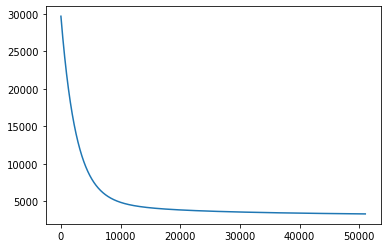

In [21]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

> 학습을 진행하면서 MSE 수치를 담았던 ```losses```의 값들을 선으로 이은 그래프입니다.  
  학습에 의해 loss값이 최적의 방정식을 찾아 내려가는 모습입니다.

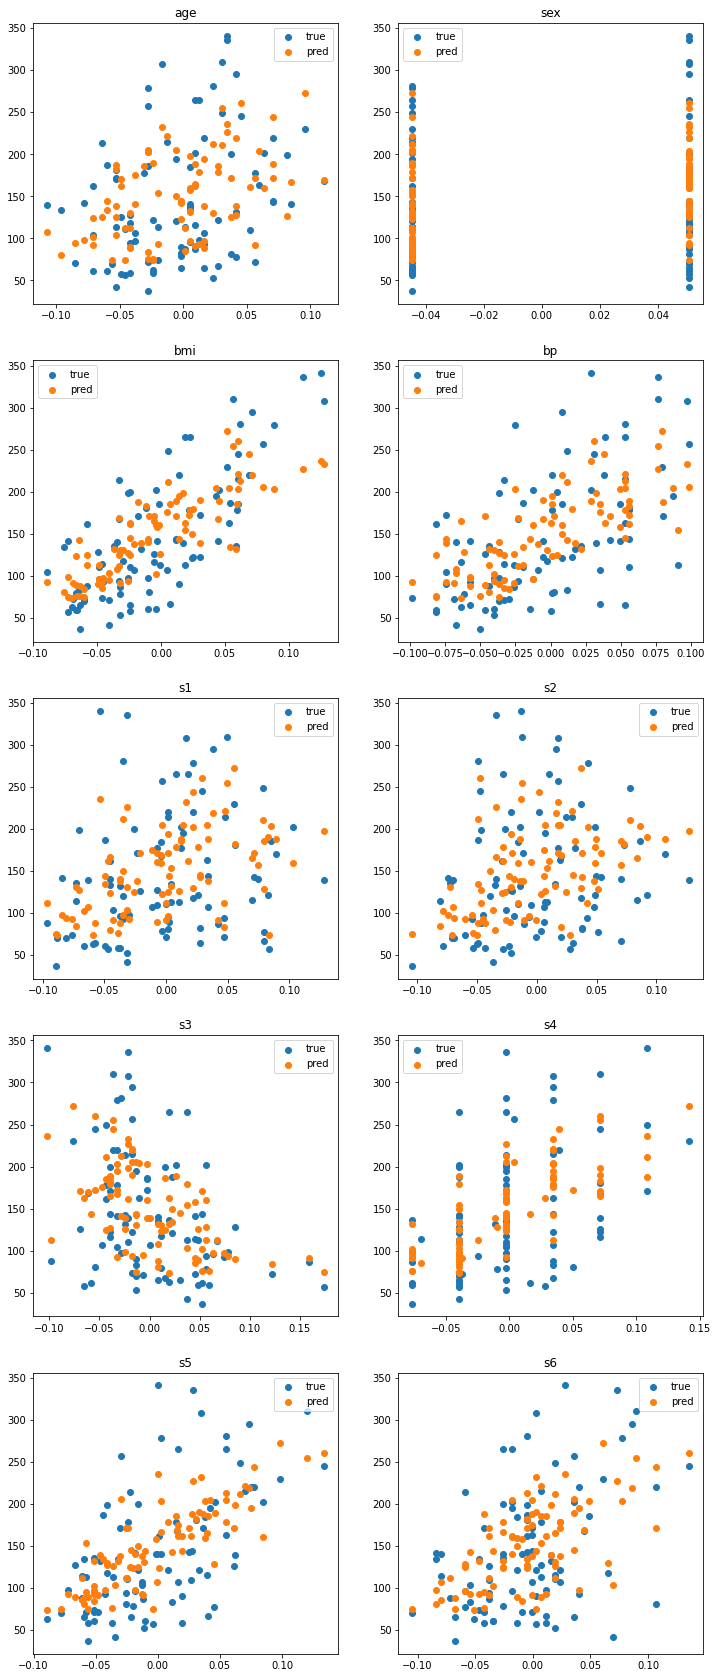

In [22]:
fig, ax = plt.subplots(5, 2, figsize=(12, 30))

columns = diabetes.feature_names

for i in range(len(columns)):
    plt.subplot(5, 2, 1+i)
    plt.scatter(X_test[:, i], y_test, label="true")
    plt.scatter(X_test[:, i], y_pred, label="pred")
    plt.title(columns[i])
    plt.legend()

plt.show()

> 각 특성에 따른 비교 산점도입니다.  
  **x축은 특성값, y축은 레이블값**으로 점의 분포 양상이 비슷할수록 예측값에 더 깊게 관여한 특성이라 할 수 있습니다.  

    시각화를 하고 나니 다음에 다시 당뇨병 데이터를 학습하게 될 때 참고할 수 있을 것 같습니다.

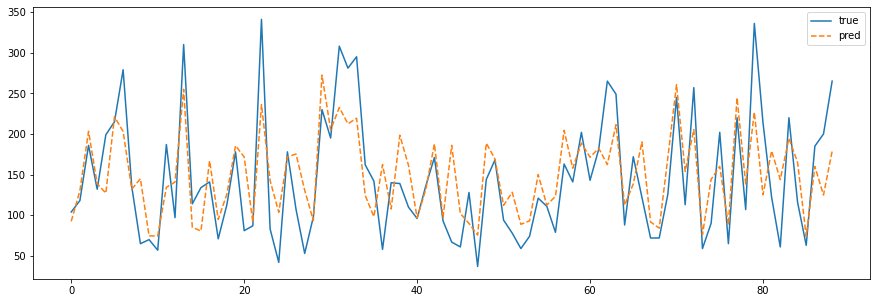

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(y_test,'-', label='true')
plt.plot(y_pred,'--', label='pred')
plt.legend()

plt.show()

> 레이블과 예측값을 함께 선 그래프로 표현한 모습입니다.  
  당뇨병 수치의 학습 결과를 가장 직관적으로 확인할 수 있는 그래프라 생각했습니다.  
  
    프로젝트 내용에는 넣지 않았지만 학습을 과하게 하면 할수록 train 데이터에 대해서는 손실이 점점 줄어드는 반면
    test 데이터에 대해서는 오히려 정확도가 떨어지는 오버 피팅 현상을 볼 수 있었습니다.  
    언더 피팅에 대해서도 덕분에 자세히 알 수 있게 되었습니다.

프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
====

- - -
__데이터 가져오기__

In [24]:
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


> pandas를 이용해 클라우드에 있는 자전거 공유 수요 데이터를 불러왔습니다.  
    
각 컬럼들에 대해서 설명하자면 이렇습니다.  

```
1. datettime : 날짜와 시간  
2. season : 계절 (1 = 봄| 2 = 여름| 3 = 가을| 4 = 겨울)  
3. holiday : 주말 또는 휴일인지  
4. workingday : 근무일인지  
5. weather : 날씨 (1 = 맑음| 2 = 흐림| 3 = 약한 비나 눈| 4 = 폭우나 폭설)  
6. temp : 섭씨 온도  
7. atemp : 체감 온도  
8. humidity : 습도  
9. windspeed : 풍속  
10. casual : 비회원 대여자 수  
11. registered : 회원 대여자 수  
12. count : 총 대여 수   
```   
  
  
궁극적으로 각 날짜와 시간에 따른 총 대여 수를 기록한 데이터 같습니다.

- - -
__datetime 컬럼을 시간 자료형으로 변환하고 시간 컬럼 생성하기__

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


> `info`를 살펴보니 12개의 특성과 10886개의 데이터, 결측치는 없는 것을 확인했습니다.  
  그런데 ```datetime``` 컬럼을 보니 **object** 형태로 저장이 되어있습니다.  

시간 자료는 꽤 중요한 데이터입니다.  
```datetime```의 시간 자료를 활용하기 위해 `pandas`의 시간 자료형으로 변환하겠습니다.

In [26]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

> pandas의 ```to_datetime``` 메서드를 이용해 datetime 컬럼을 시간 자료형으로 변환했습니다.  

    이제 간편하게 시간 데이터를 연, 월, 일, 시간, 분, 초 6개의 컬럼으로 저장할 수 있겠습니다.

In [27]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


> ```datetime```에 있던 각 시간 자료가 year, month, day, hour, minute, second 컬럼에 담겼습니다.

- - -
__시간 데이터 시각화하기__

<u>*'각 날짜와 시간에 따라 대여 수는 어느 정도였는데, 그 때의 날씨는 어떻고 상황은 어떻더라'*</u>  

하는 내용의 데이터이기 때문에 날짜와 시간에 따른 대여 수를 먼저 살펴볼 필요가 있습니다.

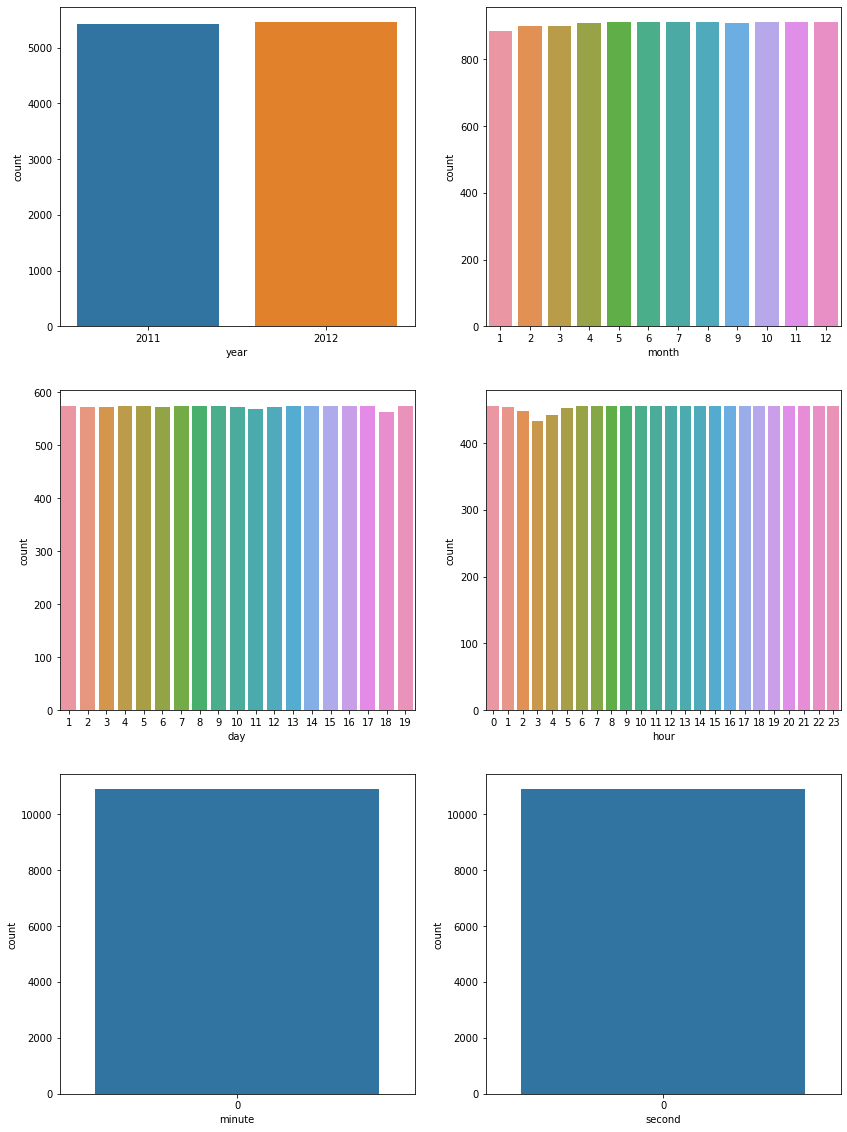

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['year', 'month', 'day', 'hour', 'minute', 'second']

fig, ax = plt.subplots(3, 2, figsize=(14, 20))

for i in range(len(columns)):
    plt.subplot(3, 2, 1+i)
    ax = sns.countplot(x=columns[i], data=train)

plt.show()

> 데이터 시각화를 위해 `matplotlib`의 `pyplot` 모듈과 `seaborn` 모듈을 불러와 시간 컬럼별 `countplot`을 생성했습니다.   
  데이터를 기록할 때 분과 초까진 구분하지 않았기 때문에 `minute`과 `second`는 0의 값만 가지고 있습니다.  

    단순히 연속되는 컬럼별 값의 개수를 확인하는 그래프인데 조금씩 차이가 발생합니다.  
    18일이 다른 날보다 조금 낮고, 03시가 다른 시간보다 살짝 낮다는 것은 제외된 시간이 있다는거죠.  
    예상되는 부분이 한 가지 있기는 합니다.

In [29]:
train['count'].min()

1

> 대여 수 컬럼의 최저치는 0이 아닌 1입니다.  

모든 시간마다 한 명씩 대여를 해왔다거나 대여 수 카운트를 1부터 시작하는 것은 아닐테니  
<u>*'대여 수가 0인 데이터들은 제외되었다.'*</u> 로 보는 게 맞을 것 같습니다.

    그 외에 날짜가 20일까지 밖에 없는 것은 정확하게 알 수 없으나 20일 이후의 날짜가 결측된 것은 아니기 때문에  
    알고리즘 학습에는 영향이 없을 것 같습니다.

- - -
__데이터 분석하기__

결국은 시간별 대여 수를 기록한 데이터이므로 시간 자료를 먼저 확인해보겠습니다.

In [30]:
grouped = train['count'].groupby(train['year']).sum()

grouped

year
2011     781979
2012    1303497
Name: count, dtype: int64

> 2011년과 2012년에 대한 데이터가 있고, 2011년보다 2012년에 더 많이 이용한 것을 볼 수 있습니다.  

    각 년도별 총 대여 수의 차이를 시각화 해보겠습니다.

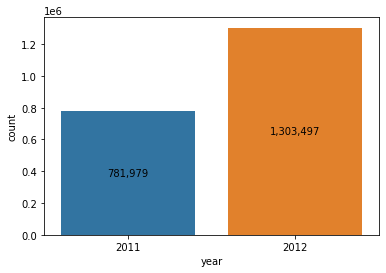

In [31]:
ax = sns.barplot(data=grouped.reset_index(), x='year', y='count')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.show()

    알고리즘이 학습을 하면 2012년도의 데이터에 대해 대여 수를 더 높게 예측할 것 같습니다.
    나머지 시간 자료별 대여 수도 확인해보겠습니다.

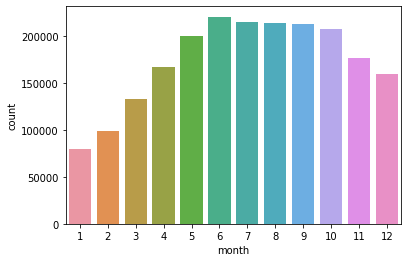

In [32]:
grouped = train['count'].groupby(train['month']).sum()

ax = sns.barplot(data=grouped.reset_index(), x='month', y='count')
plt.show()

> 월별 총 대여 수를 그린 그래프입니다.  
  1월에 대여 수가 가장 적고 6월까지 점점 올라가는 추세를 확인할 수 있습니다.

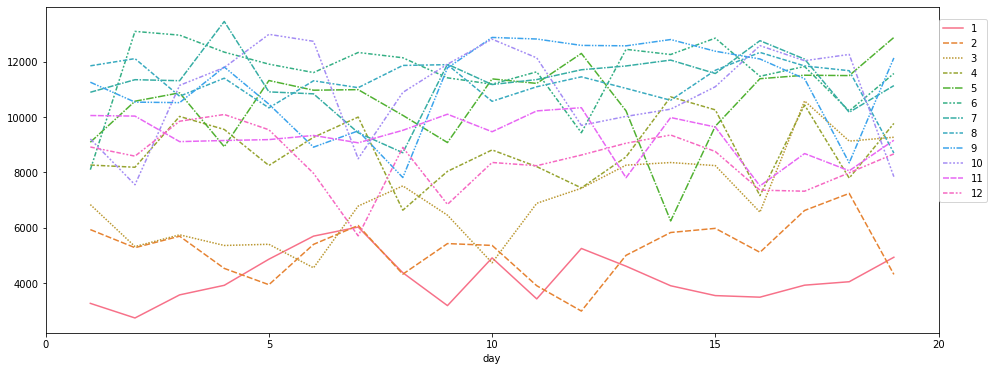

In [33]:
grouped = train['count'].groupby([train['day'], train['month']]).sum()

plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=grouped.unstack())
plt.xticks([0, 5, 10, 15, 20])
plt.legend(loc=(1, 0.4))
plt.show()

> 각 월별 요일의 대여 수를 표현한 그래프입니다.  
  특이사항이나 대여 수와의 연관성은 보이지 않습니다.

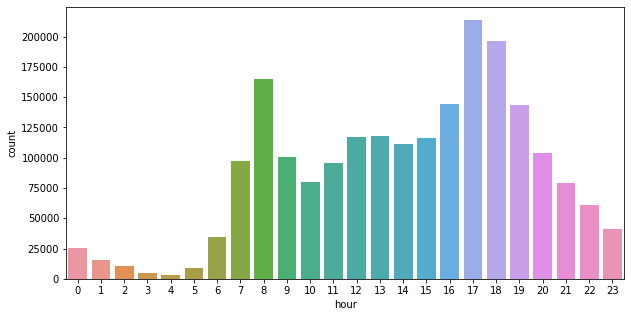

In [34]:
grouped = train['count'].groupby(train['hour']).sum()

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=grouped.reset_index(), x='hour', y='count')
plt.show()

> 시간별 이용자 수입니다.  
  자정부터 새벽까지 이용자 수가 적고, 출근시간과 퇴근시간에 이용자 수가 많은 것을 확인할 수 있습니다.  

    우리가 학습에 활용해야 하는 특성은 값의 변동에 비례해서 대여 수의 차이가 발생하는 데이터여야 합니다.  
    시간 자료 외에 온도와 습도, 풍속 등에 대한 데이터도 간단히 살펴보겠습니다.

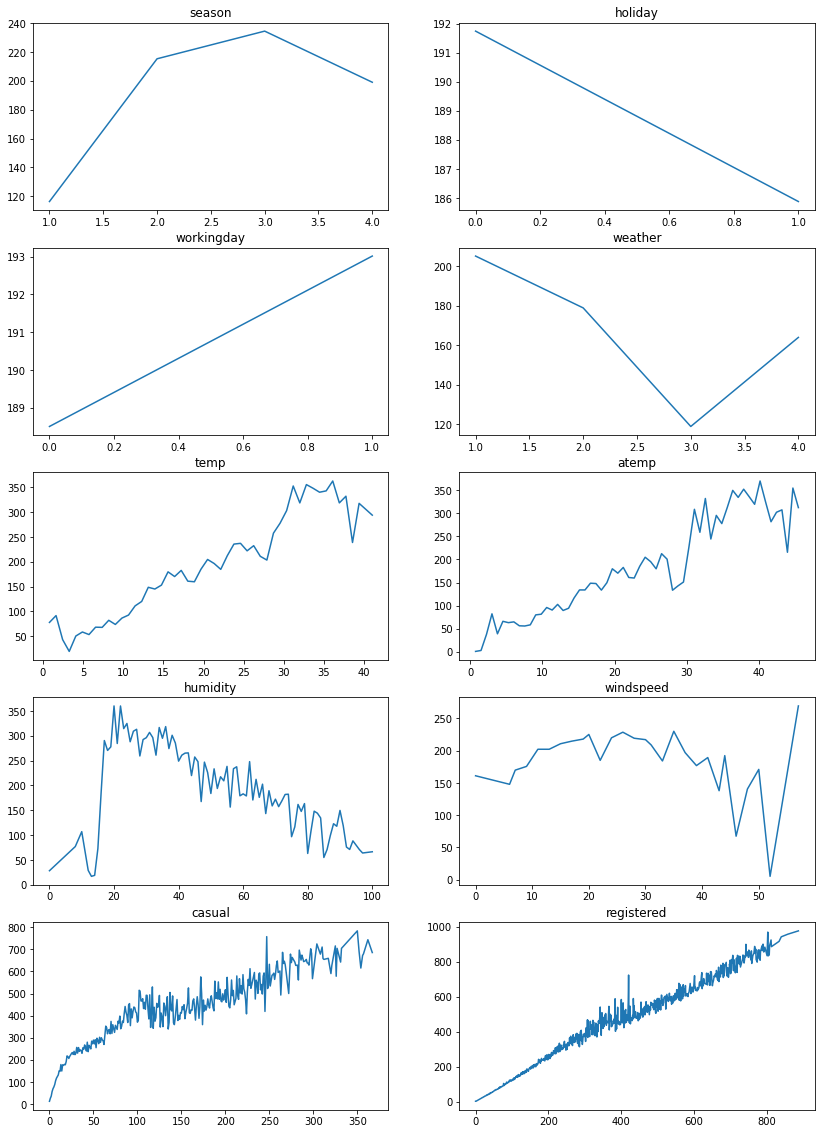

In [35]:
columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

fig, ax = plt.subplots(5, 2, figsize=(14, 20))

for i in range(len(columns)):
    grouped = train['count'].groupby(train[columns[i]]).mean()
    plt.subplot(5, 2, 1+i)
    plt.plot(grouped)
    plt.title(columns[i])

plt.show()

> 특성의 값들마다 총 대여 수의 평균을 그래프로 그려봤습니다.  
  선이 일정한 방향으로 기울수록 학습에 도움이 될 수 있겠습니다.  
  
풍속(`windspeed`)과 날씨(`weather`)를 제외한 대부분의 특성들이 일정한 방향으로 움직이는 모습을 보이긴 하나,  
그저 그 값의 분포가 적거나 많아서 생기는 결과일지 아직 모릅니다.  
특히 비회원 대여 수(`casual`)와 회원 대여 수 (`registered`)에 대해서는 좀 더 살펴봐야 할 것 같습니다.

- - -
__X, y 컬럼 선택 및 train/test 데이터 분리__

In [36]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


`datetime`은 6개의 컬럼으로 나눠서 시간별 컬럼을 생성했으니 제외해주고,  
`minute`과 `second`는 0의 값만 가지고 있기 때문에 마찬가지로 제외해주겠습니다.

In [37]:
train.drop(columns=['datetime', 'minute', 'second'], inplace=True)
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


앞서 시각화한 데이터 중에서 `day`와 `windspeed` 컬럼도 총 대여 수와는 관계가 없는 모습을 보였으니 제외해주겠습니다.

In [38]:
train.drop(columns=['day', 'windspeed'], inplace=True)
train

,season,holiday,workingday,weather,temp,atemp,humidity,casual,registered,count,year,month,hour
0,1,0,0,1,9.84,14.395,81,3,13,16,2011,1,0
1,1,0,0,1,9.02,13.635,80,8,32,40,2011,1,1
2,1,0,0,1,9.02,13.635,80,5,27,32,2011,1,2
3,1,0,0,1,9.84,14.395,75,3,10,13,2011,1,3
4,1,0,0,1,9.84,14.395,75,0,1,1,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,7,329,336,2012,12,19
10882,4,0,1,1,14.76,17.425,57,10,231,241,2012,12,20
10883,4,0,1,1,13.94,15.910,61,4,164,168,2012,12,21
10884,4,0,1,1,13.94,17.425,61,12,117,129,2012,12,22


`year` 컬럼은 '2011'과 '2012'의 값만 가지고 있으므로 **2011은 0**으로, **2012는 1**로 바꿔주겠습니다.

In [39]:
train['year'] = train['year'].apply(lambda i: 1 if i==2012 else 0)
train

,season,holiday,workingday,weather,temp,atemp,humidity,casual,registered,count,year,month,hour
0,1,0,0,1,9.84,14.395,81,3,13,16,0,1,0
1,1,0,0,1,9.02,13.635,80,8,32,40,0,1,1
2,1,0,0,1,9.02,13.635,80,5,27,32,0,1,2
3,1,0,0,1,9.84,14.395,75,3,10,13,0,1,3
4,1,0,0,1,9.84,14.395,75,0,1,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,7,329,336,1,12,19
10882,4,0,1,1,14.76,17.425,57,10,231,241,1,12,20
10883,4,0,1,1,13.94,15.910,61,4,164,168,1,12,21
10884,4,0,1,1,13.94,17.425,61,12,117,129,1,12,22


> 제거 후 13개의 컬럼이 남았습니다.  

    그래프상에 뾰족(?)한 것이 많던 온도와 습도 특성들도 살펴보겠습니다.

In [40]:
train['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

> 첫번째로 온도`temp`의 `describe`를 보니 표준편차가 상대적으로 낮습니다.  

    다른 컬럼의 표준 편차도 살펴보겠습니다.

In [41]:
columns = ['temp', 'atemp', 'humidity']
print(train[columns].std())

temp         7.791590
atemp        8.474601
humidity    19.245033
dtype: float64


> 온도, 체감온도, 습도의 비교 그래프가 뾰족했던 이유는 분포 양상이 몰려있었기 때문인 것 같습니다.

    위 컬럼들의 값에 로그변환을 하겠습니다.

In [42]:
import numpy as np

train[columns] = np.log1p(train[columns])
train

,season,holiday,workingday,weather,temp,atemp,humidity,casual,registered,count,year,month,hour
0,1,0,0,1,2.383243,2.734043,4.406719,3,13,16,0,1,0
1,1,0,0,1,2.304583,2.683416,4.394449,8,32,40,0,1,1
2,1,0,0,1,2.304583,2.683416,4.394449,5,27,32,0,1,2
3,1,0,0,1,2.383243,2.734043,4.330733,3,10,13,0,1,3
4,1,0,0,1,2.383243,2.734043,4.330733,0,1,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,2.808197,3.029892,3.931826,7,329,336,1,12,19
10882,4,0,1,1,2.757475,2.913708,4.060443,10,231,241,1,12,20
10883,4,0,1,1,2.704042,2.827905,4.127134,4,164,168,1,12,21
10884,4,0,1,1,2.704042,2.913708,4.127134,12,117,129,1,12,22


> `numpy` 모듈의 `np.log1p`로 각 컬럼들을 로그변환했습니다.

    날씨 그래프도 내려가다가 올라가는 모습을 보였으니 확인해보겠습니다.

In [43]:
count_weather = train['weather'].groupby(train['weather']).count()

count_weather

weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

> `weather` 값들의 개수를 확인해봤습니다.  

4의 값을 가진 데이터가 한 개 뿐이여서 그랬습니다.  
한 개 뿐이니 건드리지 않아도 될 것 같습니다.

마지막으로 `casual`과 `registered`를 살펴보겠습니다.  
~~사실 casual과 registered만 더하면 결과가 나오기는 하는데~~  
그래프 상으로는 연관성을 보였지만 그저 분포가 몰려있어서 나온 결과인지 단일 컬럼끼리의 분표 양상을 비교해보겠습니다.

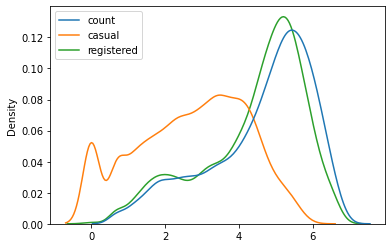

In [44]:
temp = np.log1p(train['count']), np.log1p(train['casual']), np.log1p(train['registered'])
ax = sns.kdeplot(data=temp)

plt.show()

> 로그변환한 `casual`과 `registered`의 분포도를 `count`의 분포도와 비교한 그래프입니다.  

`registered`는 연관성이 깊지만 `casual`은 그렇지 않습니다.  
`registered`만 활용하고, `casual`은 제외하겠습니다.

In [45]:
train.drop(columns=['casual'], inplace=True)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,registered,count,year,month,hour
0,1,0,0,1,2.383243,2.734043,4.406719,13,16,0,1,0
1,1,0,0,1,2.304583,2.683416,4.394449,32,40,0,1,1
2,1,0,0,1,2.304583,2.683416,4.394449,27,32,0,1,2
3,1,0,0,1,2.383243,2.734043,4.330733,10,13,0,1,3
4,1,0,0,1,2.383243,2.734043,4.330733,1,1,0,1,4


데이터 준비가 끝났으니 타겟 데이터인 `count`를 변수 `y`에 담고, `train`데이터와 `test`데이터로 분리하겠습니다.

In [46]:
from sklearn.model_selection import train_test_split

y = train['count']
train.drop(columns='count', inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=1337)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

train.head()

(8708, 11)
(8708,)
(2178, 11)
(2178,)


,season,holiday,workingday,weather,temp,atemp,humidity,registered,year,month,hour
0,1,0,0,1,2.383243,2.734043,4.406719,13,0,1,0
1,1,0,0,1,2.304583,2.683416,4.394449,32,0,1,1
2,1,0,0,1,2.304583,2.683416,4.394449,27,0,1,2
3,1,0,0,1,2.383243,2.734043,4.330733,10,0,1,3
4,1,0,0,1,2.383243,2.734043,4.330733,1,0,1,4


- - -
__LinearRegression 모델 학습__

In [47]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

> `scikik-learn`에서 제공하는 `LinearRegression` 모듈을 불러와 학습을 진행했습니다.

- - -
__예측값 출력 및 손실함수값 계산__

In [48]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()
    rmse = mse ** 0.5
    
    return mse, rmse

mse, rmse = RMSE(y_test, y_pred)

print(f'MSE : {mse}')
print(f'RMSE : {rmse}')

MSE : 1186.2217750552336
RMSE : 34.44157044989722


> **MSE**값과 **RMSE**값을 계산하고 반환하는 함수를 만들어 출력했습니다.  
  **MSE**는 약 1180, **RMSE**는 약 34의 값이 나왔습니다.

- - -
__예측 결과 시각화하기__

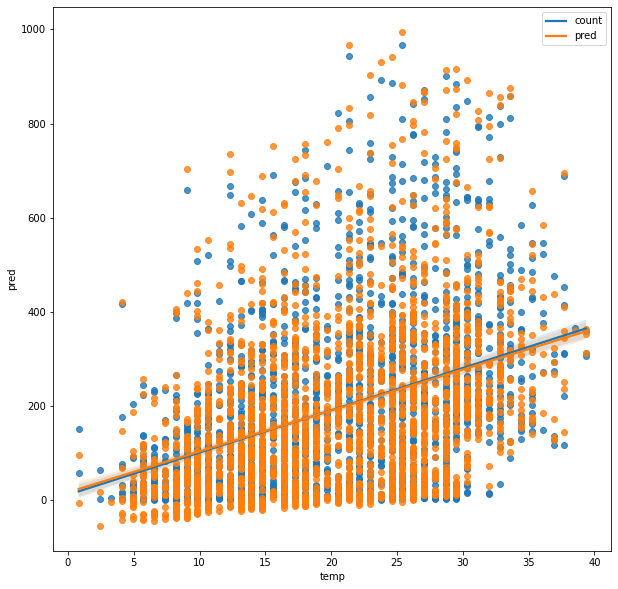

In [49]:
columns = ['temp', 'atemp', 'humidity']

X_test[columns] = np.expm1(X_test[columns])

temp = pd.concat([X_test['temp'], y_test], axis=1)
temp['pred'] = y_pred

plt.figure(figsize=(10, 10))
ax = sns.regplot(data=temp, x='temp', y='count')
ax = sns.regplot(data=temp, x='temp', y='pred')
plt.legend(['count', 'pred'])
plt.show()

> `X_test`에 로그변환을 했던 `temp`, `atemp`, `humidity`를 다시 되돌려주고  
  `temp` 데이터에 대한 `y_test`와 `y_pred`의 회귀선 그래프를 그었습니다.  

    회귀선이 거의 일치하는 모습을 보이기는 하나 솔직히 제가 정상적으로 비교한 것인지 잘 모르겠습니다.

- - -
__마무리하며__

### 프로젝트(1) : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!  

처음 당뇨병 수치 데이터를 확인했을 때 정규화가 되어있는 데이터를 보면서  
이 데이터를 어떻게 전처리를 해야 좋을까 다양한 시도를 해봤습니다.  

어떤 특성을 빼거나 더해보고 학습을 진행해보기도 하고,  
각각의 특성만으로 학습을 진행해보기도 하고,  

결국 어떤 특성이 결과와 가장 연관이 있는가는 찾았는데 그걸 또 학습에 활용하기란 쉽지 않았습니다.  
그래서 프로젝트 내용도 한참 데이터를 분석하다가 포기하고 바로 모델의 성능을 확인하는 내용으로 흐지부지 넘어갔습니다.  

루브릭의 평가 기준에 의하면 MSE가 3000이하의 값이 나와야 한다고 했는데 아무리 학습을 진행해도  
학습용 데이터에 대해선 2800까진 내려갔지만, 테스트용 데이터의 MSE 오차값은 3200이 나오는겁니다.  

당연히 학습용 데이터의 오차값이 낮으면 테스트용 데이터의 오차도 낮을 것이라 생각하고  
학습량을 100만번 까지 돌려보기도 해봤지만 결과는 그대로였습니다.  

MSE가 3000 이하로 내려간 조원분들은 학습률과 학습량을 어떻게 했는지 조언을 받고 참고를 하면서  
학습률과 학습량을 오히려 줄여봤습니다.  

학습용 데이터의 MSE값이 3000에 달할 때 테스트용 데이터로 성능을 확인해보니 2800으로 오히려 더 낮은 MSE값을 달성했습니다.  
이 부분에 대해서 나름 생각도 좀 해보고 검색도 해본 결과 오버피팅, 즉 과학습 현상이라고 하더군요.  

당뇨병 수치 데이터는 모델이 학습을 하는 과정을 공부한다기 보단 오버피팅과 언더피팅에 대해서 알려주는 과정이였던겁니다.  
~~그것도 모르고 저는 며칠 동안 데이터 전처리 시도만..~~   
덕분에 오버피팅과 언더피팅의 정의와 원리가 제 머리 속에 고생을 한 만큼 깊게 박히게 되었습니다.  

결론은 학습량이 많다고 해서 무조건 좋은 것은 아니다.  
아이러니하게도 **'뭐든 과하면 독이 된다'**가 좌우명인 저에게 뼈를 가격하는 교훈도 남겨줬습니다.

- - -
### 프로젝트(2) : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?  

본격적으로 데이터 전처리 방법을 학습하는 프로젝트였습니다.  
데이터를 전처리 하기 위해선 데이터에 대한 이해가 필요했고,  
데이터를 이해하기 위해선 데이터를 시각화할 줄 알아야했습니다.  

데이터를 이해하는 것은 자신이 있었으나 막상 데이터를 원하는 그래프로 시각화할 줄을 몰라서 엄청 답답했던 시간이였습니다.  
구글에 'plt'와 'seaborn' 검색만 수십 번은 한 것 같습니다.  
그래프를 꾸미는 방법은 검색을 해도 찾기가 어려워서 많이 생략한 것 같습니다.  

데이터를 전처리 할 때 고민이 많이 된 부분이 있습니다.  
계절 특성의 경우 봄에서 여름 가을로 갈수록 대여 수가 많아졌는데 겨울에서는 줄어들었습니다.  

당연한 결과입니다. 사실 `봄-여름-가을-겨울` 순이 아닌 `여름-가을-겨울-봄` 순으로 본다면 더 알맞지 않았을까 하는 생각에  
겨울의 값을 바꿔볼 생각도 했지만 그러면 월별과 시간별 특성의 값을 바꾸는 것도 가능한데 그러면 데이터를 튜닝하는 수준이 아닐까.  
그렇게 따지면 `casual`과 `registered`를 합친 새로운 `count` 특성을 추가하는 것도 가능한 게 아닌가 하는 생각이 들어서  
모델 학습의 의미가 없어질까봐 실행하진 않았습니다.  

대여 수가 0이여서 삭제된 시간들도 주변 10개의 값들의 평균을 넣고 임의로 추가해 볼 생각도 했지만  
그 방법이 쉽지도 않을 뿐더러 대여 수가 0인 데이터가 그리 많지도 않아 효과가 미미할 것 같고  
제가 추가한 데이터를 테스트에 확용하게 된다면 그것도 모순이 될까봐 실행하진 않았습니다.  

그래도 전처리를 마치고 학습을 해본 결과 RMSE값이 낮은 건지는 모르겠지만 루브릭 평가 기준보다 낮아서 만족스러운 결과를 얻었습니다.  
